In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

In [3]:
#stocks_eur = pd.read_json(r"C:\Users\Acer\Downloads\Telegram Desktop\XRP_EUR.json")

In [4]:
#stocks_usd = pd.read_json(r"C:\Users\Acer\Downloads\Telegram Desktop\XRP_USD.json")

In [5]:
#stocks = pd.read_json(r"C:\Users\Acer\Downloads\Telegram Desktop\sample_BTCset_1.json")

In [283]:
stocks = pd.read_json(r"data.json")

In [284]:
stocks.rename({"priceCurrencyOne":"priceUSD"}, axis = 1, inplace = True)
stocks.rename({"priceCurrencyTwo":"priceEUR"}, axis = 1, inplace = True)

stocks.drop(["currencyOne", "currencyTwo"], axis = 1, inplace = True)
stocks.head()

,id,tmsp,priceUSD,priceEUR,cryptoCurrency
0,1,1618866864,56314.7,46807.7,BTC
1,2,1618866866,56314.7,46807.7,BTC
2,3,1618866867,56314.7,46807.7,BTC
3,4,1618866869,56314.7,46807.7,BTC
4,5,1618866871,56314.7,46807.7,BTC


Excluding all null values and taking separate BTC and XRP samples

In [285]:
sample_BTC = stocks[(stocks['tmsp']!='null')
                &(stocks['priceUSD']!='null')
                &(stocks['priceEUR']!='null')
               &(stocks['cryptoCurrency']=='BTC')].copy()

In [286]:
sample_XRP = stocks[(stocks['tmsp']!='null')
                &(stocks['priceUSD']!='null')
                &(stocks['priceEUR']!='null')
               &(stocks['cryptoCurrency']=='XRP')].copy()

sample_BTC preprocessing

In [287]:
def preprocess (sample):
    sample.tmsp = [datetime.datetime.fromtimestamp(x) for x in sample.tmsp.astype(int)]
    sample.priceUSD = sample.priceUSD.astype(float)
    sample.priceEUR = sample.priceEUR.astype(float)
    return sample

In [288]:
sample_BTC = preprocess(sample_BTC)
sample_XRP = preprocess(sample_XRP)

<AxesSubplot:xlabel='tmsp'>

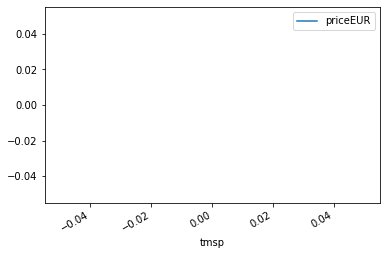

In [289]:
sample_BTC[(sample_BTC.tmsp>'2021-02-16 17:07:37')&(sample_BTC.tmsp<'2021-02-16 17:30:37')].plot(x='tmsp', y='priceEUR')

<AxesSubplot:xlabel='tmsp'>

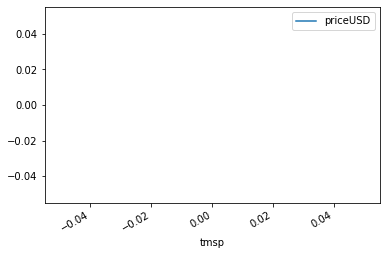

In [290]:
sample_BTC[(sample_BTC.tmsp>'2021-02-16 17:07:37')&(sample_BTC.tmsp<'2021-02-16 17:30:37')].plot(x='tmsp', y='priceUSD')

<AxesSubplot:xlabel='tmsp'>

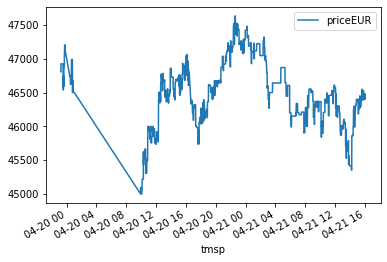

In [291]:
sample_BTC.plot(x='tmsp', y='priceEUR')

<AxesSubplot:xlabel='tmsp'>

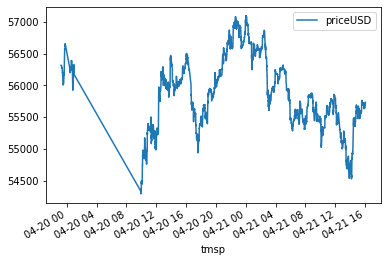

In [292]:
sample_BTC.plot(x='tmsp', y='priceUSD')

In [293]:
sample_BTC["diff_eur"] = (sample_BTC.priceEUR/sample_BTC.priceEUR.shift(1))-1
sample_BTC["diff_usd"] = (sample_BTC.priceUSD/sample_BTC.priceUSD.shift(1))-1

In [294]:
sample_BTC.head(6)

,id,tmsp,priceUSD,priceEUR,cryptoCurrency,diff_eur,diff_usd
0,1,2021-04-19 23:14:24,56314.7,46807.7,BTC,NaN,NaN
1,2,2021-04-19 23:14:26,56314.7,46807.7,BTC,0.0,0.0
2,3,2021-04-19 23:14:27,56314.7,46807.7,BTC,0.0,0.0
3,4,2021-04-19 23:14:29,56314.7,46807.7,BTC,0.0,0.0
4,5,2021-04-19 23:14:31,56314.7,46807.7,BTC,0.0,0.0
5,6,2021-04-19 23:14:32,56314.7,46807.7,BTC,0.0,0.0


In [489]:
timespan = 16
sensitivity = 0

In [490]:
def list_pop (my_list):
    my_list_new = my_list.copy()
    return list(filter(lambda a: a != "wait", my_list_new))[-1]

In [504]:
import tqdm
final_list = []

for i in tqdm.tqdm(list(range(1000))): #53549
    sample_BTC_new = sample_BTC[(sample_BTC.tmsp>=(sample_BTC.tmsp[i]- pd.to_timedelta(f"00:00:{timespan}"))) & (sample_BTC.tmsp<=sample_BTC.tmsp[i])].copy()
    value = ((sample_BTC_new[sample_BTC_new.tmsp == sample_BTC_new.tmsp.max()].priceUSD.values[0])/sample_BTC_new[sample_BTC_new.tmsp== sample_BTC_new.tmsp.min()].priceUSD.values[0])-1 
    
    if ((abs(value) > sensitivity)) and value>0:
        try:
            if (list_pop(final_list) != 'buy') == True:
                final_list.append("buy") 
            else:
                final_list.append("wait") 
        except:
            final_list.append("buy")
        
    elif ((abs(value) > sensitivity)) and value<0: 
        try:
            if (list_pop(final_list) != 'sell') == True:
                final_list.append("sell") 
            else:
                final_list.append("wait") 
        except:
            final_list.append("sell")
    
    else: 
        final_list.append("wait")

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 279.64it/s]


In [498]:
#sample_BTC.iloc[:100,:] = sample_BTC.iloc[:100,:].join(pd.DataFrame(final_list, columns = ["index", "decision_"]).set_index("index"))

In [499]:
#sample_BTC["decision"] = np.where(sample_BTC.decision == "sell", "not buy", sample_BTC.decision)

In [509]:
test = sample_BTC.iloc[90:200,:].join(pd.DataFrame(final_list, columns = ["decision_"])).head(30)

In [510]:
test

,id,tmsp,priceUSD,priceEUR,cryptoCurrency,diff_eur,diff_usd,decision,decision_
90,91,2021-04-19 23:20:48,56278.7,46925.1,BTC,0.0,-0.000467,buy,wait
91,92,2021-04-19 23:20:50,56278.7,46925.1,BTC,0.0,0.000000,not buy,wait
92,93,2021-04-19 23:20:51,56278.7,46925.1,BTC,0.0,0.000000,not buy,wait
93,94,2021-04-19 23:20:53,56278.7,46925.1,BTC,0.0,0.000000,not buy,wait
94,95,2021-04-19 23:20:54,56278.7,46925.1,BTC,0.0,0.000000,not buy,wait
95,96,2021-04-19 23:20:56,56278.7,46925.1,BTC,0.0,0.000000,not buy,wait
96,97,2021-04-19 23:20:58,56273.1,46925.1,BTC,0.0,-0.000100,not buy,wait
97,98,2021-04-19 23:21:00,56273.1,46925.1,BTC,0.0,0.000000,not buy,wait
98,99,2021-04-19 23:21:01,56273.1,46925.1,BTC,0.0,0.000000,not buy,wait
99,100,2021-04-19 23:21:03,56273.1,46925.1,BTC,0.0,0.000000,not buy,wait


In [506]:
test[test.decision_ == "buy"]

,id,tmsp,priceUSD,priceEUR,cryptoCurrency,diff_eur,diff_usd,decision,decision_
104,105,2021-04-19 23:21:13,56278.2,46925.1,BTC,0.0,0.000000,not buy,buy
141,142,2021-04-19 23:27:15,56166.7,46925.1,BTC,0.0,0.000499,not buy,buy
239,240,2021-04-19 23:30:28,56010.7,46925.1,BTC,0.0,0.000000,not buy,buy
351,352,2021-04-19 23:33:51,56028.1,46538.6,BTC,0.0,0.000109,not buy,buy
504,505,2021-04-19 23:38:26,56167.4,46885.6,BTC,0.0,0.000182,not buy,buy
529,530,2021-04-19 23:39:08,56177.4,46885.5,BTC,0.0,0.000000,not buy,buy
568,569,2021-04-19 23:42:09,56404.1,47072.6,BTC,0.0,0.000656,not buy,buy
624,625,2021-04-19 23:43:48,56571.2,47205.0,BTC,0.0,0.000000,not buy,buy
695,696,2021-04-19 23:46:02,56574.3,47205.0,BTC,0.0,0.000044,not buy,buy
701,702,2021-04-19 23:46:14,56574.3,47205.0,BTC,0.0,0.000046,not buy,buy


In [384]:
from_ = '2021-04-16 0:10:37'
to = '2021-04-16 23:13:37'

import seaborn as sns
sns.lineplot(sample_BTC=sample_BTC[((sample_BTC.tmsp>from_)&(sample_BTC.tmsp<to)) & (abs(sample_BTC.diff_eur)>0.00001)], x = "tmsp", y ="diff_eur")
sns.lineplot(sample_BTC=sample_BTC[((sample_BTC.tmsp>from_)&(sample_BTC.tmsp<to)) & (abs(sample_BTC.diff_eur)>0.00001)], x = "tmsp", y ="diff_usd")

ValueError: Could not interpret value `tmsp` for parameter `x`

In [194]:
sample_BTC["diff_usd"] = sample_BTC["diff_usd"].shift(-1)

In [195]:
#sample_BTC['year']=sample_BTC['tmsp'].dt.year 
#sample_BTC['month']=sample_BTC['tmsp'].dt.month 
#sample_BTC['day']=sample_BTC['tmsp'].dt.day
#
#sample_BTC['dayofweek_num']=sample_BTC['tmsp'].dt.dayofweek  
#sample_BTC['dayofweek_name']=sample_BTC['tmsp'].dt.weekday

In [196]:
#sample_BTC['hour']=sample_BTC['tmsp'].dt.hour  
#sample_BTC['minute']=sample_BTC['tmsp'].dt.minute

In [197]:
sample_BTC['lag_1_eur'] = sample_BTC['diff_eur'].shift(1)
sample_BTC['lag_2_eur'] = sample_BTC['diff_eur'].shift(2)
sample_BTC['lag_3_eur'] = sample_BTC['diff_eur'].shift(3)
sample_BTC['lag_4_eur'] = sample_BTC['diff_eur'].shift(4)
sample_BTC['lag_5_eur'] = sample_BTC['diff_eur'].shift(5)
sample_BTC['lag_6_eur'] = sample_BTC['diff_eur'].shift(6)
sample_BTC['lag_7_eur'] = sample_BTC['diff_eur'].shift(7)

In [198]:
sample_BTC['lag_1_usd'] = sample_BTC['diff_usd'].shift(1)
sample_BTC['lag_2_usd'] = sample_BTC['diff_usd'].shift(2)
sample_BTC['lag_3_usd'] = sample_BTC['diff_usd'].shift(3)
sample_BTC['lag_4_usd'] = sample_BTC['diff_usd'].shift(4)
sample_BTC['lag_5_usd'] = sample_BTC['diff_usd'].shift(5)
sample_BTC['lag_6_usd'] = sample_BTC['diff_usd'].shift(6)
sample_BTC['lag_7_usd'] = sample_BTC['diff_usd'].shift(7)

In [199]:
sample_BTC['rolling_mean_usd'] = sample_BTC['diff_usd'].rolling(window=7).mean()

In [200]:
sample_BTC['rolling_mean_eur'] = sample_BTC['diff_eur'].rolling(window=7).mean()

In [201]:
sample_BTC['tmsp'].min(), sample_BTC['tmsp'].max(), (sample_BTC['tmsp'].max() -sample_BTC['tmsp'].min())

(Timestamp('2021-04-19 23:14:24'),
 Timestamp('2021-04-21 16:02:04'),
 Timedelta('1 days 16:47:40'))

In [202]:
sample_BTC = sample_BTC.fillna(-100)

In [203]:
sample_BTC.drop(["id", "priceUSD", "priceEUR", "cryptoCurrency"], axis = 1, inplace =True)

In [205]:
#sample_BTC.drop(["year", "month"], axis = 1, inplace =True)

In [220]:
X_train = sample_BTC.sort_values("tmsp").iloc[:37500,:]
X_test = sample_BTC.sort_values("tmsp").iloc[37500:,:]

In [229]:
from sklearn.preprocessing import MinMaxScaler


def data_preproc_lstm (X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train.iloc[:,1:])
    X_train.iloc[:,1:] = scaler.transform(X_train.iloc[:,1:])

    scaler.fit(X_test.iloc[:,1:])
    X_test.iloc[:,1:] = scaler.transform(X_test.iloc[:,1:])

    y_train = X_train.diff_eur
    X_train.drop('diff_eur',axis = 1, inplace = True)

    #Convert to numpy arrays
    X_train, y_train = np.array(X_train.iloc[:,1:]), np.array(y_train)

    #Reshape the data into 3-D array
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    return X_train, y_train

In [224]:
X_train, y_train = data_preproc_lstm(X_train)

In [225]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [226]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))

In [227]:
#compile and fit the model on 30 epochs
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 30, batch_size = 50)

Epoch 1/30
750/750 [==============================] - 34s 35ms/step - loss: 0.0420
Epoch 2/30
750/750 [==============================] - 27s 36ms/step - loss: 0.0046
Epoch 3/30
750/750 [==============================] - 28s 37ms/step - loss: 0.0038
Epoch 4/30
750/750 [==============================] - 30s 39ms/step - loss: 0.0030
Epoch 5/30
750/750 [==============================] - 29s 39ms/step - loss: 0.0021
Epoch 6/30
750/750 [==============================] - 29s 39ms/step - loss: 0.0013
Epoch 7/30
750/750 [==============================] - 30s 40ms/step - loss: 8.1285e-04
Epoch 8/30
750/750 [==============================] - 28s 37ms/step - loss: 3.5958e-04
Epoch 9/30
750/750 [==============================] - 31s 41ms/step - loss: 1.4576e-04
Epoch 10/30
750/750 [==============================] - 28s 37ms/step - loss: 7.9009e-05
Epoch 11/30
750/750 [==============================] - 29s 39ms/step - loss: 4.2854e-05
Epoch 12/30
750/750 [==============================] - 30s 40ms/s

In [230]:
X_test, y_test = data_preproc_lstm(X_test)

In [256]:
#check predicted values
predictions = model.predict(X_test) 

In [258]:
predictions_ = predictions
i=0
while i<17:
    predictions = np.append(predictions, predictions_,1)
    i+=1

In [260]:

#Undo scaling
predictions = scaler.inverse_transform(predictions)

In [263]:
final_list = []
for row in predictions:
    final_list.append(row[0])

In [266]:


#Calculate RMSE score
rmse=np.sqrt(np.mean(((final_list- y_test)**2)))
rmse

0.4350605230886565

## Modeling

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [92]:
#from sklearn import preprocessing
#
#min_max_scaler = preprocessing.MinMaxScaler()
#sample_BTC["priceUSD_normalized"]  = min_max_scaler.fit_transform(sample_BTC[["priceUSD"]].values)

## PACF and ACF (autocorrelation function) plots

Find out about their formulas, and how do exactly they work


https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

Time series models 
https://towardssample_BTCscience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb


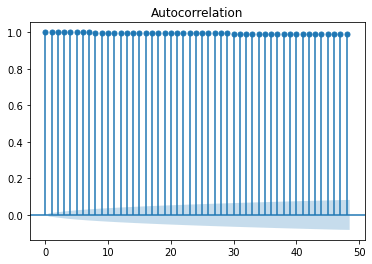

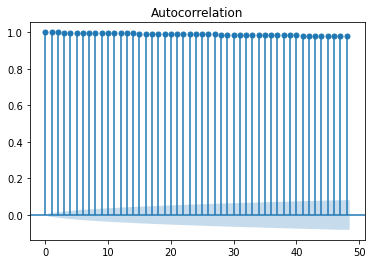

In [119]:
plot_acf(sample_BTC.priceUSD)
plot_acf(sample_BTC.priceEUR)
plt.show()

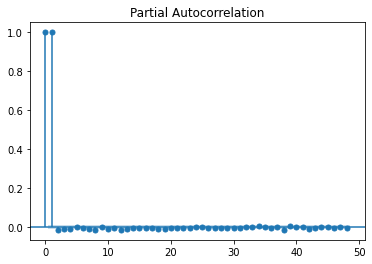

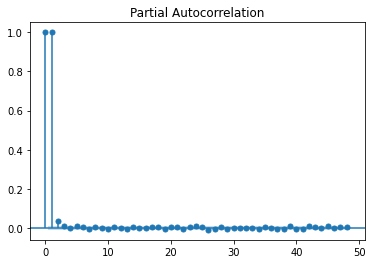

In [120]:
plot_pacf(sample_BTC.priceUSD)
plot_pacf(sample_BTC.priceEUR)
plt.show()

In [154]:
stocks_eur.set_index("tmsp", inplace = True)

In [157]:
from sklearn import preprocessing
sample_BTC_normaliser = preprocessing.MinMaxScaler()
stocks_eur["price"] = sample_BTC_normaliser.fit_transform(stocks_eur)